In [1]:
import pandas as pd
import numpy as np

import xgboost as xgb
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score

import os
import joblib
import pickle

import time
import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt

from matplotlib.pyplot import figure
import matplotlib.image as mpimg

import stability as st

import statistics
import scipy as scp
import math

import lime
from lime import lime_tabular

import shap

In [2]:
PATH = "C:/Users/velmurug/Documents/Stability Experiments/Breast Cancer/"
#PATH = "C:/Users/mythr/Documents/GitHub/Stability-Experiments/Breast Cancer/"
model_filename = os.path.join(PATH, "models/diabetes_xgb.joblib")
dataset_path = 'datasets/'
model = joblib.load(model_filename)

In [3]:
tp_file = os.path.join(PATH, "datasets/dicts/true_pos.pkl")
with open (tp_file, 'rb') as f:
    results = pickle.load(f)
    
f.close()

In [4]:
X_train = pd.read_csv(PATH + "datasets/breast_cancer_Xtrain.csv", index_col=False).values
X_test = pd.read_csv(PATH + "datasets/breast_cancer_Xtest.csv", index_col=False).values
X_validation =pd.read_csv(PATH + "datasets/breast_cancer_Xvalidation.csv",index_col=False).values
y_train = pd.read_csv(PATH + "datasets/breast_cancer_Ytrain.csv",index_col=False).values
y_test =pd.read_csv(PATH + "datasets/breast_cancer_Ytest.csv", index_col=False).values
y_validation = pd.read_csv(PATH + "datasets/breast_cancer_Yvalidation.csv", index_col=False).values

original_data = pd.read_csv(PATH + "datasets/breast_cancer.csv")
original_data = original_data.dropna(axis = 'columns')
original_data = original_data.drop(['id'], axis = 1)
feature_names = original_data.drop(["diagnosis"], axis = 1).columns

In [5]:
predictions = model.predict(X_test)

In [6]:
MAX_FEAT = 10

start_time = time.time()

# LIME has one explainer for all the models
explainer = lime_tabular.LimeTabularExplainer(X_train, feature_names= feature_names, 
                                                  class_names=["Benign", "Malignant"], verbose=False, mode='classification')

elapsed = time.time() - start_time

print ("Time taken to create explainer:", round(elapsed, 2), "seconds")

Time taken to create explainer: 0.01 seconds


In [7]:
stability_scores = []
probas = []

feat_list = list(feature_names)

for instance in results:
    print ("Running instance", results.index(instance))
    
    feat_pres = []

    print("INDEX = %d" %instance['index'])
    patients_feat = np.array(instance['scaled_vector'])
    prediction = instance['predictions']
    probas.append(instance['prediction_probability'][1])
    
    start_time = time.time()
    # explain instance
    
    for iteration in range(100):
        print("Run", iteration)
        lime_exp = explainer.explain_instance(patients_feat, model.predict_proba, num_features = 30)
        
        #For stability by index
        presence_list = [0]*len(feat_list)
    
        for each in feat_list:
            list_idx = feat_list.index(each)
            #print ("Feature", list_idx)
            for explanation in lime_exp.as_list(prediction):
                if each in explanation[0]:
                    if lime_exp.as_list(prediction).index(explanation) < MAX_FEAT:
                        presence_list[list_idx] = 1
                        
        feat_pres.append(presence_list)
        
        #method 1 - Nogueira, Sechidis, Brown.
    stability = st.getStability(feat_pres[:10])
    print ("Stability:", round(stability,2))
    stability_scores.append(stability)
 
    print("\n--------------------------------------------------------------------------------------------\n")

Running instance 0
INDEX = 37
Run 0
Run 1
Run 2
Run 3
Run 4
Run 5
Run 6
Run 7
Run 8
Run 9
Run 10
Run 11
Run 12
Run 13
Run 14
Run 15
Run 16
Run 17
Run 18
Run 19
Run 20
Run 21
Run 22
Run 23
Run 24
Run 25
Run 26
Run 27
Run 28
Run 29
Run 30
Run 31
Run 32
Run 33
Run 34
Run 35
Run 36
Run 37
Run 38
Run 39
Run 40
Run 41
Run 42
Run 43
Run 44
Run 45
Run 46
Run 47
Run 48
Run 49
Run 50
Run 51
Run 52
Run 53
Run 54
Run 55
Run 56
Run 57
Run 58
Run 59
Run 60
Run 61
Run 62
Run 63
Run 64
Run 65
Run 66
Run 67
Run 68
Run 69
Run 70
Run 71
Run 72
Run 73
Run 74
Run 75
Run 76
Run 77
Run 78
Run 79
Run 80
Run 81
Run 82
Run 83
Run 84
Run 85
Run 86
Run 87
Run 88
Run 89
Run 90
Run 91
Run 92
Run 93
Run 94
Run 95
Run 96
Run 97
Run 98
Run 99
Stability: 0.81

--------------------------------------------------------------------------------------------

Running instance 1
INDEX = 0
Run 0
Run 1
Run 2
Run 3
Run 4
Run 5
Run 6
Run 7
Run 8
Run 9
Run 10
Run 11
Run 12
Run 13
Run 14
Run 15
Run 16
Run 17
Run 18
Run 19
Run 20
Run

Stability: 0.83

--------------------------------------------------------------------------------------------

Running instance 10
INDEX = 56
Run 0
Run 1
Run 2
Run 3
Run 4
Run 5
Run 6
Run 7
Run 8
Run 9
Run 10
Run 11
Run 12
Run 13
Run 14
Run 15
Run 16
Run 17
Run 18
Run 19
Run 20
Run 21
Run 22
Run 23
Run 24
Run 25
Run 26
Run 27
Run 28
Run 29
Run 30
Run 31
Run 32
Run 33
Run 34
Run 35
Run 36
Run 37
Run 38
Run 39
Run 40
Run 41
Run 42
Run 43
Run 44
Run 45
Run 46
Run 47
Run 48
Run 49
Run 50
Run 51
Run 52
Run 53
Run 54
Run 55
Run 56
Run 57
Run 58
Run 59
Run 60
Run 61
Run 62
Run 63
Run 64
Run 65
Run 66
Run 67
Run 68
Run 69
Run 70
Run 71
Run 72
Run 73
Run 74
Run 75
Run 76
Run 77
Run 78
Run 79
Run 80
Run 81
Run 82
Run 83
Run 84
Run 85
Run 86
Run 87
Run 88
Run 89
Run 90
Run 91
Run 92
Run 93
Run 94
Run 95
Run 96
Run 97
Run 98
Run 99
Stability: 0.85

--------------------------------------------------------------------------------------------

Running instance 11
INDEX = 39
Run 0
Run 1
Run 2
Run 3
Ru

Run 83
Run 84
Run 85
Run 86
Run 87
Run 88
Run 89
Run 90
Run 91
Run 92
Run 93
Run 94
Run 95
Run 96
Run 97
Run 98
Run 99
Stability: 0.8

--------------------------------------------------------------------------------------------

Running instance 20
INDEX = 31
Run 0
Run 1
Run 2
Run 3
Run 4
Run 5
Run 6
Run 7
Run 8
Run 9
Run 10
Run 11
Run 12
Run 13
Run 14
Run 15
Run 16
Run 17
Run 18
Run 19
Run 20
Run 21
Run 22
Run 23
Run 24
Run 25
Run 26
Run 27
Run 28
Run 29
Run 30
Run 31
Run 32
Run 33
Run 34
Run 35
Run 36
Run 37
Run 38
Run 39
Run 40
Run 41
Run 42
Run 43
Run 44
Run 45
Run 46
Run 47
Run 48
Run 49
Run 50
Run 51
Run 52
Run 53
Run 54
Run 55
Run 56
Run 57
Run 58
Run 59
Run 60
Run 61
Run 62
Run 63
Run 64
Run 65
Run 66
Run 67
Run 68
Run 69
Run 70
Run 71
Run 72
Run 73
Run 74
Run 75
Run 76
Run 77
Run 78
Run 79
Run 80
Run 81
Run 82
Run 83
Run 84
Run 85
Run 86
Run 87
Run 88
Run 89
Run 90
Run 91
Run 92
Run 93
Run 94
Run 95
Run 96
Run 97
Run 98
Run 99
Stability: 0.86

---------------------------------

# SHAP

In [8]:
X_train_frame = pd.DataFrame(data = X_train, columns = feature_names)
X_test_frame = pd.DataFrame(data = X_test, columns = feature_names)

data_sample = shap.kmeans(X_train_frame, 100)
shap_explainer = shap.KernelExplainer(model.predict, data_sample)#, link = 'identity')

shap.initjs()

In [13]:
def create_samples(shap_explainer, iterations, row, features, top = 10):
    length = len(features)
    
    exp = []
    rel_exp = []
    
    for j in range(iterations):
        #print(X_test_frame.loc[row])
        shap_values = shap_explainer.shap_values(row)
        #print(shap_values)

        importances = []
        
        if type(shap_explainer) == shap.explainers.kernel.KernelExplainer:
            for i in range(length):
                feat = features[i]
                shap_val = shap_values[0][i]
                abs_val = abs(shap_values[0][i])
                entry = (feat, shap_val, abs_val)
                importances.append(entry)
        else:
            for i in range(length):
                feat = features[i]
                shap_val = shap_values[0][i]
                abs_val = abs(shap_values[0][i])
                entry = (feat, shap_val, abs_val)
                importances.append(entry)
                #print(entry)

        importances.sort(key=lambda tup: tup[2], reverse = True)
        
        exp.append(importances)

        rel_feat = []

        for i in range(top):
            feat = importances[i]
            if feat[2] > 0:
                rel_feat.append(feat)
                
        rel_exp.append(rel_feat)
        
    return exp, rel_exp

In [14]:
shap_stability_scores = []
probas = []

for instance in results:
    
    print("INDEX = %d" %instance['index'])
    patients_feat = pd.Series(instance['scaled_vector'])
    prediction = instance['predictions']
    probas.append(instance['prediction_probability'][1])
    
    loc = results.index(instance)
    
    exp, rel_exp = create_samples(shap_explainer, 100, patients_feat.values.reshape(-1,30), feature_names, top = MAX_FEAT)
    
    print(rel_exp)
    
    feat_pres = []
    
    for iteration in rel_exp:
        print("Iteration", rel_exp.index(iteration))
        #print(iteration)

        #Stability by index
        presence_list = [0]*len(feat_list)
        
        for each in feat_list:
            list_idx = feat_list.index(each)
            #print ("Feature", list_idx)
            for explanation in iteration:
                if each in explanation[0]:
                    #by index
                    presence_list[list_idx] = 1
                    
        feat_pres.append(presence_list)
        
    stability = st.getStability(feat_pres)
    print ("Stability:", round(stability,2))
    shap_stability_scores.append(stability)

INDEX = 37



[[('smoothness_worst', 0.20092103132800637, 0.20092103132800637), ('fractal_dimension_worst', 0.13343354204707158, 0.13343354204707158), ('concave points_worst', 0.09816617666051405, 0.09816617666051405), ('concave points_mean', 0.0957505122081718, 0.0957505122081718), ('compactness_worst', 0.0865032468186944, 0.0865032468186944), ('perimeter_worst', -0.08639986684715684, 0.08639986684715684), ('concavity_mean', 0.07522217918998214, 0.07522217918998214), ('concavity_worst', 0.07409570589496639, 0.07409570589496639), ('radius_worst', -0.058645780224262076, 0.058645780224262076), ('fractal_dimension_mean', -0.05547461574768986, 0.05547461574768986)], [('smoothness_worst', 0.2124985247641333, 0.2124985247641333), ('fractal_dimension_worst', 0.12925608131594934, 0.12925608131594934), ('concave points_mean', 0.10367845090705263, 0.10367845090705263), ('perimeter_worst', -0.09551649137898569, 0.09551649137898569), ('concave points_worst', 0.09389700721319927, 0.09389700721319927), ('compact


[[('perimeter_worst', 0.22364836092147505, 0.22364836092147505), ('radius_worst', 0.17044312194179687, 0.17044312194179687), ('area_worst', 0.05682827046603933, 0.05682827046603933), ('smoothness_se', 0.025055808677080738, 0.025055808677080738), ('concavity_worst', 0.01706831218258109, 0.01706831218258109), ('concave points_worst', 0.00796234760973591, 0.00796234760973591), ('radius_mean', 0.005197840147623034, 0.005197840147623034), ('compactness_worst', 0.00473694782162859, 0.00473694782162859), ('compactness_mean', 0.0029161942232939775, 0.0029161942232939775), ('smoothness_mean', 0.0013970332968810395, 0.0013970332968810395)], [('perimeter_worst', 0.22368220370653913, 0.22368220370653913), ('radius_worst', 0.17522080663499662, 0.17522080663499662), ('area_worst', 0.05157872269966993, 0.05157872269966993), ('smoothness_se', 0.01963323221348262, 0.01963323221348262), ('concavity_worst', 0.019057410986985657, 0.019057410986985657), ('concave points_worst', 0.00862405114120779, 0.0086


[[('perimeter_worst', 0.17612644374562386, 0.17612644374562386), ('radius_worst', 0.10571578727146541, 0.10571578727146541), ('area_se', 0.07449700025729161, 0.07449700025729161), ('area_worst', 0.062571767916272, 0.062571767916272), ('concave points_mean', 0.020446819219825496, 0.020446819219825496), ('compactness_se', -0.013478317516380373, 0.013478317516380373), ('fractal_dimension_worst', 0.011606661662682871, 0.011606661662682871), ('texture_worst', 0.010329346487351454, 0.010329346487351454), ('symmetry_mean', 0.010180971542919137, 0.010180971542919137), ('concavity_worst', 0.010081256478567502, 0.010081256478567502)], [('perimeter_worst', 0.1571225452547319, 0.1571225452547319), ('radius_worst', 0.12218938832875387, 0.12218938832875387), ('area_worst', 0.07191187295308243, 0.07191187295308243), ('area_se', 0.07104384831652022, 0.07104384831652022), ('concavity_worst', 0.020618357171383328, 0.020618357171383328), ('concave points_mean', 0.019977615402591742, 0.019977615402591742


[[('radius_worst', 0.19369437492118236, 0.19369437492118236), ('perimeter_worst', 0.13592837190700707, 0.13592837190700707), ('area_worst', 0.061118149065375216, 0.061118149065375216), ('area_se', 0.027822298673374213, 0.027822298673374213), ('concave points_worst', 0.026167668036697234, 0.026167668036697234), ('concavity_worst', 0.019176225298990934, 0.019176225298990934), ('texture_worst', 0.016664494163503685, 0.016664494163503685), ('perimeter_mean', 0.007985385000792877, 0.007985385000792877), ('concavity_mean', 0.006504575997628187, 0.006504575997628187), ('compactness_worst', 0.006106866269033007, 0.006106866269033007)], [('radius_worst', 0.19797260811037826, 0.19797260811037826), ('perimeter_worst', 0.14203410240767783, 0.14203410240767783), ('area_worst', 0.06608961437059574, 0.06608961437059574), ('concavity_worst', 0.029171083473680026, 0.029171083473680026), ('concave points_worst', 0.023048744410987254, 0.023048744410987254), ('area_se', 0.020532215059528264, 0.0205322150


[[('radius_worst', 0.19083418109517164, 0.19083418109517164), ('perimeter_worst', 0.13618661952799166, 0.13618661952799166), ('area_worst', 0.0740226070542131, 0.0740226070542131), ('concave points_worst', 0.031834828707667795, 0.031834828707667795), ('concavity_worst', 0.028428982851927298, 0.028428982851927298), ('area_se', 0.02343828089144706, 0.02343828089144706), ('texture_worst', 0.009346428015325536, 0.009346428015325536), ('radius_mean', 0.00898962864148889, 0.00898962864148889), ('fractal_dimension_se', 0.0037324718093343368, 0.0037324718093343368), ('radius_se', 0.0034280762749329674, 0.0034280762749329674)], [('radius_worst', 0.19602321558808805, 0.19602321558808805), ('perimeter_worst', 0.14320604560726047, 0.14320604560726047), ('area_worst', 0.06721519445632324, 0.06721519445632324), ('concavity_worst', 0.02920662058975354, 0.02920662058975354), ('concave points_worst', 0.02770374295331718, 0.02770374295331718), ('area_se', 0.026679516792824987, 0.026679516792824987), ('


[[('perimeter_worst', 0.21611351896192935, 0.21611351896192935), ('concave points_mean', 0.0905277894684628, 0.0905277894684628), ('concave points_worst', 0.059031561476346917, 0.059031561476346917), ('radius_worst', 0.05621459294877518, 0.05621459294877518), ('concavity_worst', 0.02922535642323229, 0.02922535642323229), ('concavity_mean', 0.015196754320549233, 0.015196754320549233), ('area_se', 0.01026745243340521, 0.01026745243340521), ('radius_mean', 0.00812087326565869, 0.00812087326565869), ('area_worst', 0.007827029044168266, 0.007827029044168266), ('texture_worst', 0.007355176200650376, 0.007355176200650376)], [('perimeter_worst', 0.21560621328998436, 0.21560621328998436), ('concave points_mean', 0.09203300589124663, 0.09203300589124663), ('concave points_worst', 0.056423337806532525, 0.056423337806532525), ('radius_worst', 0.053462190037021795, 0.053462190037021795), ('concavity_worst', 0.023381792885259323, 0.023381792885259323), ('concavity_mean', 0.011942745995001225, 0.011


[[('perimeter_worst', 0.1677689032976341, 0.1677689032976341), ('concave points_mean', 0.09476995341650946, 0.09476995341650946), ('radius_worst', 0.07149823813859299, 0.07149823813859299), ('concave points_worst', 0.06579709092377373, 0.06579709092377373), ('texture_worst', 0.029114946185531954, 0.029114946185531954), ('concavity_mean', 0.027729423936882602, 0.027729423936882602), ('concavity_worst', 0.021293725131153934, 0.021293725131153934), ('area_worst', 0.016752250982717376, 0.016752250982717376), ('area_se', 0.007497944936453477, 0.007497944936453477), ('area_mean', 0.004228265787442037, 0.004228265787442037)], [('perimeter_worst', 0.16834814315989333, 0.16834814315989333), ('concave points_mean', 0.08977935393806724, 0.08977935393806724), ('radius_worst', 0.06712845092996106, 0.06712845092996106), ('concave points_worst', 0.050862113499952344, 0.050862113499952344), ('texture_worst', 0.028030182150083016, 0.028030182150083016), ('concavity_worst', 0.025607775092067797, 0.0256


[[('perimeter_worst', 0.14895008174694752, 0.14895008174694752), ('radius_worst', 0.13133252358377479, 0.13133252358377479), ('area_worst', 0.0850056965737101, 0.0850056965737101), ('concave points_mean', 0.03407222301216001, 0.03407222301216001), ('concavity_worst', 0.031088551612932724, 0.031088551612932724), ('concave points_worst', 0.021609466220883722, 0.021609466220883722), ('texture_mean', 0.009109598419643483, 0.009109598419643483), ('smoothness_se', 0.00762594424771279, 0.00762594424771279), ('fractal_dimension_mean', 0.00675154451682447, 0.00675154451682447), ('symmetry_se', 0.006139301452823209, 0.006139301452823209)], [('perimeter_worst', 0.1581423965087348, 0.1581423965087348), ('radius_worst', 0.11387006850991338, 0.11387006850991338), ('area_worst', 0.09291937055136423, 0.09291937055136423), ('concave points_mean', 0.04384045225897232, 0.04384045225897232), ('concavity_worst', 0.03424608969263815, 0.03424608969263815), ('concave points_worst', 0.020655237846799623, 0.02


[[('perimeter_worst', 0.17414418921250346, 0.17414418921250346), ('radius_worst', 0.11236142927456061, 0.11236142927456061), ('concave points_mean', 0.07153873712176068, 0.07153873712176068), ('area_worst', 0.0511237416609755, 0.0511237416609755), ('concave points_worst', 0.034563795283051146, 0.034563795283051146), ('concavity_worst', 0.033687576466123914, 0.033687576466123914), ('texture_worst', 0.010312048258298706, 0.010312048258298706), ('concavity_mean', 0.010144311140554974, 0.010144311140554974), ('smoothness_se', 0.0073460517070985665, 0.0073460517070985665), ('fractal_dimension_mean', 0.003100687372268207, 0.003100687372268207)], [('perimeter_worst', 0.18065489447602434, 0.18065489447602434), ('radius_worst', 0.11111859302481147, 0.11111859302481147), ('concave points_mean', 0.05685596525751202, 0.05685596525751202), ('area_worst', 0.04916801475127555, 0.04916801475127555), ('concave points_worst', 0.030952889320956745, 0.030952889320956745), ('concavity_worst', 0.0234796191


[[('perimeter_worst', 0.14629191078505288, 0.14629191078505288), ('radius_worst', 0.09370652433145316, 0.09370652433145316), ('area_se', 0.06407984584176801, 0.06407984584176801), ('area_worst', 0.058511081242347274, 0.058511081242347274), ('concave points_mean', 0.05115280675514147, 0.05115280675514147), ('concave points_worst', 0.04093063271458053, 0.04093063271458053), ('concavity_worst', 0.026849657360061313, 0.026849657360061313), ('symmetry_se', 0.010922389552710798, 0.010922389552710798), ('concavity_mean', 0.009418969872868277, 0.009418969872868277), ('texture_mean', 0.006901319679053081, 0.006901319679053081)], [('perimeter_worst', 0.16072028311709335, 0.16072028311709335), ('radius_worst', 0.0787262077420329, 0.0787262077420329), ('concave points_mean', 0.059464105192476024, 0.059464105192476024), ('area_se', 0.052541294580757014, 0.052541294580757014), ('area_worst', 0.049607261023000504, 0.049607261023000504), ('concavity_worst', 0.036360985064080975, 0.036360985064080975)


[[('perimeter_worst', 0.14327942761917384, 0.14327942761917384), ('radius_worst', 0.12586747294303158, 0.12586747294303158), ('concave points_mean', 0.06728618450011203, 0.06728618450011203), ('area_worst', 0.06303935623240564, 0.06303935623240564), ('concave points_worst', 0.029751577465739754, 0.029751577465739754), ('concavity_worst', 0.020429679005491808, 0.020429679005491808), ('texture_mean', 0.012269206560553164, 0.012269206560553164), ('concavity_mean', 0.009584675919642183, 0.009584675919642183), ('texture_worst', 0.009214312827301396, 0.009214312827301396), ('area_se', 0.007377595308069085, 0.007377595308069085)], [('perimeter_worst', 0.15476202009841172, 0.15476202009841172), ('radius_worst', 0.1256137513871673, 0.1256137513871673), ('area_worst', 0.06613348065160685, 0.06613348065160685), ('concave points_mean', 0.055706199113483956, 0.055706199113483956), ('concave points_worst', 0.03925792907227835, 0.03925792907227835), ('concavity_worst', 0.02279426241016541, 0.0227942


[[('perimeter_worst', 0.14633769493397164, 0.14633769493397164), ('radius_worst', 0.1083254666893062, 0.1083254666893062), ('area_se', 0.056583168743534085, 0.056583168743534085), ('area_worst', 0.05451533433313749, 0.05451533433313749), ('concave points_mean', 0.04875568930938645, 0.04875568930938645), ('concavity_worst', 0.03210703675444698, 0.03210703675444698), ('concavity_mean', 0.026887542279661614, 0.026887542279661614), ('concave points_worst', 0.017332287621515896, 0.017332287621515896), ('radius_mean', 0.005701666828309859, 0.005701666828309859), ('concave points_se', 0.005110767937672761, 0.005110767937672761)], [('perimeter_worst', 0.16342575681598925, 0.16342575681598925), ('radius_worst', 0.10335052434188519, 0.10335052434188519), ('area_worst', 0.055611286478552124, 0.055611286478552124), ('area_se', 0.05487104496568601, 0.05487104496568601), ('concave points_mean', 0.04922016314676078, 0.04922016314676078), ('concavity_worst', 0.04602434065898203, 0.04602434065898203),


[[('perimeter_worst', 0.14619289391694518, 0.14619289391694518), ('radius_worst', 0.09943037757233739, 0.09943037757233739), ('concave points_mean', 0.053492379806272444, 0.053492379806272444), ('area_worst', 0.050389779900291476, 0.050389779900291476), ('concavity_worst', 0.040360006833208395, 0.040360006833208395), ('area_se', 0.03888564602796857, 0.03888564602796857), ('concave points_worst', 0.025011035711251406, 0.025011035711251406), ('concavity_mean', 0.015842086407239997, 0.015842086407239997), ('smoothness_mean', 0.014911208814192944, 0.014911208814192944), ('perimeter_mean', 0.01191723665935887, 0.01191723665935887)], [('perimeter_worst', 0.13597694063851434, 0.13597694063851434), ('radius_worst', 0.10605721083153835, 0.10605721083153835), ('concave points_mean', 0.048365916002744425, 0.048365916002744425), ('area_worst', 0.04683207880841617, 0.04683207880841617), ('concavity_worst', 0.04464176373342427, 0.04464176373342427), ('area_se', 0.0373246895119759, 0.037324689511975


[[('perimeter_worst', 0.13330622417687255, 0.13330622417687255), ('radius_worst', 0.1022430638175576, 0.1022430638175576), ('concave points_mean', 0.0647556124705142, 0.0647556124705142), ('area_worst', 0.06459076329253566, 0.06459076329253566), ('concave points_worst', 0.03285504662877137, 0.03285504662877137), ('concavity_worst', 0.025759400908188484, 0.025759400908188484), ('area_se', 0.02064499455585908, 0.02064499455585908), ('texture_worst', 0.013307586993014653, 0.013307586993014653), ('smoothness_worst', 0.011202792480470403, 0.011202792480470403), ('texture_mean', 0.009378934000905226, 0.009378934000905226)], [('perimeter_worst', 0.13402913999798954, 0.13402913999798954), ('radius_worst', 0.11267577202904927, 0.11267577202904927), ('area_worst', 0.06309391674419429, 0.06309391674419429), ('concave points_mean', 0.05747881080804179, 0.05747881080804179), ('concavity_worst', 0.03460336523494295, 0.03460336523494295), ('concave points_worst', 0.03093766266920267, 0.0309376626692


[[('perimeter_worst', 0.14101855268474006, 0.14101855268474006), ('radius_worst', 0.08530342867093738, 0.08530342867093738), ('area_se', 0.052439954752060564, 0.052439954752060564), ('concavity_worst', 0.041882930333879076, 0.041882930333879076), ('concave points_mean', 0.04146077785989327, 0.04146077785989327), ('area_worst', 0.03883590258789699, 0.03883590258789699), ('concave points_worst', 0.023372871267833994, 0.023372871267833994), ('texture_worst', 0.01865499323768094, 0.01865499323768094), ('smoothness_se', 0.01065028862470685, 0.01065028862470685), ('concavity_se', 0.010646021773651454, 0.010646021773651454)], [('perimeter_worst', 0.1380344890816626, 0.1380344890816626), ('radius_worst', 0.11452657819178358, 0.11452657819178358), ('area_se', 0.05900563351247595, 0.05900563351247595), ('area_worst', 0.040827998272204374, 0.040827998272204374), ('concavity_worst', 0.03955250144565797, 0.03955250144565797), ('concave points_mean', 0.039407842401488924, 0.039407842401488924), ('c


[[('perimeter_worst', 0.13010744231427318, 0.13010744231427318), ('radius_worst', 0.10200783285384396, 0.10200783285384396), ('area_worst', 0.0533039303870384, 0.0533039303870384), ('area_se', 0.05077584617920605, 0.05077584617920605), ('concave points_mean', 0.05028955612416852, 0.05028955612416852), ('concavity_worst', 0.042009567224090105, 0.042009567224090105), ('concave points_worst', 0.025028203419184714, 0.025028203419184714), ('compactness_se', 0.01073010448324685, 0.01073010448324685), ('texture_worst', 0.009303130796934123, 0.009303130796934123), ('concavity_mean', 0.008504473729367967, 0.008504473729367967)], [('perimeter_worst', 0.14257079365406095, 0.14257079365406095), ('radius_worst', 0.10998692140621474, 0.10998692140621474), ('area_se', 0.04517482444928034, 0.04517482444928034), ('area_worst', 0.0418621444899549, 0.0418621444899549), ('concave points_mean', 0.04130191226612695, 0.04130191226612695), ('concavity_worst', 0.03311596736492267, 0.03311596736492267), ('conc


[[('perimeter_worst', 0.15674863467315897, 0.15674863467315897), ('radius_worst', 0.10356966673367973, 0.10356966673367973), ('area_se', 0.05678097548501332, 0.05678097548501332), ('area_worst', 0.04644850093897859, 0.04644850093897859), ('concave points_mean', 0.040543632629429116, 0.040543632629429116), ('concavity_worst', 0.037781290571567205, 0.037781290571567205), ('concave points_worst', 0.02791787343604457, 0.02791787343604457), ('concavity_mean', 0.02141308692491206, 0.02141308692491206), ('fractal_dimension_mean', -0.018325075922895007, 0.018325075922895007), ('area_mean', 0.01010867394127829, 0.01010867394127829)], [('perimeter_worst', 0.14424367033010632, 0.14424367033010632), ('radius_worst', 0.10470550557850705, 0.10470550557850705), ('area_worst', 0.05533975727487184, 0.05533975727487184), ('area_se', 0.0433986797364177, 0.0433986797364177), ('concave points_worst', 0.038674437402396344, 0.038674437402396344), ('concavity_worst', 0.03586369280312679, 0.03586369280312679)


[[('perimeter_worst', 0.14372082714651635, 0.14372082714651635), ('radius_worst', 0.11007985050202446, 0.11007985050202446), ('area_se', 0.06244949092644958, 0.06244949092644958), ('concave points_mean', 0.041998759283718046, 0.041998759283718046), ('area_worst', 0.04079406441459027, 0.04079406441459027), ('concave points_worst', 0.03629654822758166, 0.03629654822758166), ('concavity_worst', 0.03072623856876705, 0.03072623856876705), ('concavity_mean', 0.01656618313273467, 0.01656618313273467), ('texture_worst', 0.007270995641897121, 0.007270995641897121), ('compactness_worst', 0.005794485116531717, 0.005794485116531717)], [('perimeter_worst', 0.15540773587340986, 0.15540773587340986), ('radius_worst', 0.09234988444174613, 0.09234988444174613), ('area_se', 0.05786163788674853, 0.05786163788674853), ('area_worst', 0.05538262958071438, 0.05538262958071438), ('concave points_mean', 0.045917747078146, 0.045917747078146), ('concave points_worst', 0.028161088426725933, 0.028161088426725933)


[[('perimeter_worst', 0.15958888683168118, 0.15958888683168118), ('radius_worst', 0.09647854996106378, 0.09647854996106378), ('area_worst', 0.057659430949980106, 0.057659430949980106), ('concave points_mean', 0.04287921706368106, 0.04287921706368106), ('area_se', 0.041956361177170054, 0.041956361177170054), ('concave points_worst', 0.0329330118651171, 0.0329330118651171), ('concavity_worst', 0.026725238610847468, 0.026725238610847468), ('texture_worst', 0.013745420256432661, 0.013745420256432661), ('smoothness_mean', 0.008044394459266802, 0.008044394459266802), ('radius_mean', 0.007030535304243524, 0.007030535304243524)], [('perimeter_worst', 0.146893529976042, 0.146893529976042), ('radius_worst', 0.09379871379970173, 0.09379871379970173), ('area_se', 0.047587514123697106, 0.047587514123697106), ('concave points_mean', 0.04747148713827104, 0.04747148713827104), ('area_worst', 0.045451330338182994, 0.045451330338182994), ('concavity_mean', 0.031583177545483065, 0.031583177545483065), (


[[('perimeter_worst', 0.15826588783785145, 0.15826588783785145), ('radius_worst', 0.11166422358255512, 0.11166422358255512), ('area_worst', 0.06831557474175304, 0.06831557474175304), ('concave points_mean', 0.05310091716061527, 0.05310091716061527), ('concave points_worst', 0.03929467784395141, 0.03929467784395141), ('concavity_worst', 0.028940527295758356, 0.028940527295758356), ('concavity_mean', 0.009378645818618636, 0.009378645818618636), ('perimeter_se', 0.008771073126407403, 0.008771073126407403), ('symmetry_worst', 0.0081074110395295, 0.0081074110395295), ('fractal_dimension_se', 0.00745947955567261, 0.00745947955567261)], [('perimeter_worst', 0.14872367688059124, 0.14872367688059124), ('radius_worst', 0.1095162404353211, 0.1095162404353211), ('concave points_mean', 0.0687332482371667, 0.0687332482371667), ('area_worst', 0.055598730779008704, 0.055598730779008704), ('concave points_worst', 0.03742335932005797, 0.03742335932005797), ('concavity_worst', 0.02545081346586925, 0.025


[[('perimeter_worst', 0.13904656106367058, 0.13904656106367058), ('radius_worst', 0.09583744489034543, 0.09583744489034543), ('area_se', 0.055999818249886535, 0.055999818249886535), ('area_worst', 0.04636618948244525, 0.04636618948244525), ('concave points_mean', 0.04584749452931719, 0.04584749452931719), ('concave points_worst', 0.02643134280633941, 0.02643134280633941), ('concavity_se', -0.023968372719817832, 0.023968372719817832), ('concavity_worst', 0.021296383487112602, 0.021296383487112602), ('perimeter_se', 0.01909245841335383, 0.01909245841335383), ('concavity_mean', 0.01605766139427406, 0.01605766139427406)], [('perimeter_worst', 0.14385917265404036, 0.14385917265404036), ('radius_worst', 0.10264765162407125, 0.10264765162407125), ('area_se', 0.05644246411210113, 0.05644246411210113), ('area_worst', 0.05261953613615955, 0.05261953613615955), ('concave points_mean', 0.048045003108113826, 0.048045003108113826), ('concave points_worst', 0.027635129440534645, 0.027635129440534645


[[('perimeter_worst', 0.14667528962596615, 0.14667528962596615), ('radius_worst', 0.08985168190844472, 0.08985168190844472), ('area_worst', 0.06441496409119485, 0.06441496409119485), ('area_se', 0.048428786441473304, 0.048428786441473304), ('concave points_mean', 0.0429701870067945, 0.0429701870067945), ('concave points_worst', 0.03931341572822189, 0.03931341572822189), ('concavity_worst', 0.036216519831790306, 0.036216519831790306), ('concavity_mean', 0.014997590898848334, 0.014997590898848334), ('perimeter_mean', 0.014738186991779312, 0.014738186991779312), ('texture_mean', 0.005943628396895773, 0.005943628396895773)], [('perimeter_worst', 0.15298352471055582, 0.15298352471055582), ('radius_worst', 0.1049281604685891, 0.1049281604685891), ('area_se', 0.06092591047746554, 0.06092591047746554), ('concave points_mean', 0.051477360085342816, 0.051477360085342816), ('concave points_worst', 0.033982366042545425, 0.033982366042545425), ('area_worst', 0.03321020136156444, 0.0332102013615644


[[('perimeter_worst', 0.15436285490292295, 0.15436285490292295), ('radius_worst', 0.08839564547415937, 0.08839564547415937), ('area_se', 0.05506309075124233, 0.05506309075124233), ('concave points_mean', 0.05057635602483196, 0.05057635602483196), ('area_worst', 0.041590243837268226, 0.041590243837268226), ('concavity_worst', 0.03471283178736695, 0.03471283178736695), ('concave points_worst', 0.02263497985024071, 0.02263497985024071), ('concavity_mean', 0.021994002005395585, 0.021994002005395585), ('perimeter_se', 0.013989601280667674, 0.013989601280667674), ('area_mean', 0.0103055456021649, 0.0103055456021649)], [('perimeter_worst', 0.16374867217621691, 0.16374867217621691), ('radius_worst', 0.10919888983403753, 0.10919888983403753), ('area_se', 0.05870306899962935, 0.05870306899962935), ('concave points_mean', 0.04853052846742523, 0.04853052846742523), ('area_worst', 0.0338420940858693, 0.0338420940858693), ('concavity_worst', 0.03246256113094739, 0.03246256113094739), ('concave poin


[[('perimeter_worst', 0.1536931591942522, 0.1536931591942522), ('radius_worst', 0.10271123720106884, 0.10271123720106884), ('area_se', 0.056925113857440146, 0.056925113857440146), ('area_worst', 0.05105699005134923, 0.05105699005134923), ('concave points_mean', 0.0363724621094213, 0.0363724621094213), ('concavity_worst', 0.035958743849520275, 0.035958743849520275), ('concave points_worst', 0.01967662529350478, 0.01967662529350478), ('concavity_se', -0.01645772569169135, 0.01645772569169135), ('radius_se', 0.013653080754269853, 0.013653080754269853), ('texture_worst', 0.01262106733466467, 0.01262106733466467)], [('perimeter_worst', 0.14993333684321236, 0.14993333684321236), ('radius_worst', 0.10480093878790292, 0.10480093878790292), ('area_se', 0.0504868334254443, 0.0504868334254443), ('area_worst', 0.047262980379821073, 0.047262980379821073), ('concave points_worst', 0.03875746548363479, 0.03875746548363479), ('concavity_worst', 0.03580461920956218, 0.03580461920956218), ('concave poi


[[('perimeter_worst', 0.16672854328407238, 0.16672854328407238), ('radius_worst', 0.0946827006749163, 0.0946827006749163), ('area_se', 0.05307650608891612, 0.05307650608891612), ('area_worst', 0.04417444837351692, 0.04417444837351692), ('concave points_mean', 0.04227149649219003, 0.04227149649219003), ('concavity_worst', 0.03128712087785451, 0.03128712087785451), ('concavity_mean', 0.028441101764550752, 0.028441101764550752), ('concave points_worst', 0.02144373365690394, 0.02144373365690394), ('symmetry_worst', 0.007910752330670068, 0.007910752330670068), ('concave points_se', 0.005455147846494257, 0.005455147846494257)], [('perimeter_worst', 0.1441839125047919, 0.1441839125047919), ('radius_worst', 0.10207370801209364, 0.10207370801209364), ('area_se', 0.06527910719675495, 0.06527910719675495), ('area_worst', 0.0539190699266584, 0.0539190699266584), ('concave points_mean', 0.053449266818794916, 0.053449266818794916), ('concavity_worst', 0.050761769097976694, 0.050761769097976694), ('


[[('perimeter_worst', 0.15025755180796319, 0.15025755180796319), ('radius_worst', 0.11703790177693313, 0.11703790177693313), ('area_se', 0.06032713931632283, 0.06032713931632283), ('area_worst', 0.04190380979620181, 0.04190380979620181), ('concave points_mean', 0.034596832824090956, 0.034596832824090956), ('concavity_worst', 0.027934125176831248, 0.027934125176831248), ('concave points_worst', 0.026540452094752642, 0.026540452094752642), ('texture_worst', 0.020270537542001088, 0.020270537542001088), ('concavity_mean', 0.01158277850243486, 0.01158277850243486), ('compactness_mean', 0.0059440001718474855, 0.0059440001718474855)], [('perimeter_worst', 0.14349847591763343, 0.14349847591763343), ('radius_worst', 0.1246368852016595, 0.1246368852016595), ('area_worst', 0.052909666015128975, 0.052909666015128975), ('area_se', 0.04352541997699441, 0.04352541997699441), ('concave points_mean', 0.03370689955214251, 0.03370689955214251), ('concavity_worst', 0.03146482257309066, 0.0314648225730906

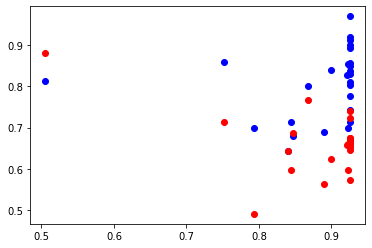

In [15]:
plt.plot(probas, stability_scores, 'bo', label = 'LIME')
plt.plot(probas, shap_stability_scores, 'ro', label = 'SHAP')
plt.show()

In [16]:
tree_explainer = shap.TreeExplainer(model)

In [17]:
tree_stability_scores = []
probas = []
feat_list = list(feature_names)

for instance in results:
    
    print("INDEX = %d" %instance['index'])
    patients_feat = pd.Series(instance['scaled_vector'])
    prediction = instance['predictions']
    probas.append(instance['prediction_probability'][1])
    
    loc = results.index(instance)
    
    exp, rel_exp = create_samples(tree_explainer, 100, patients_feat.values.reshape(-1,30), feature_names, top = MAX_FEAT)
    
    #print(rel_exp)
    
    feat_pres = []
    
    for iteration in rel_exp:
        print("Iteration", rel_exp.index(iteration))
        #print(iteration)

        #Stability by index
        presence_list = [0]*len(feat_list)
        
        for each in feat_list:
            list_idx = feat_list.index(each)
            #print ("Feature", list_idx)
            for explanation in iteration:
                if each in explanation[0]:
                    #by index
                    presence_list[list_idx] = 1
                    
        feat_pres.append(presence_list)
        
    stability = st.getStability(feat_pres)
    print ("Stability:", round(stability,2))
    tree_stability_scores.append(stability)

INDEX = 37
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Itera

Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iter

Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iter

Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iter

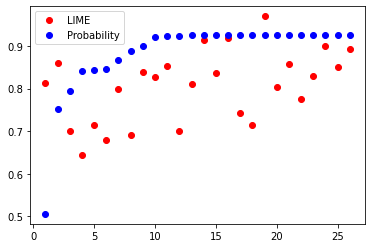

In [27]:
plt.plot(instances, stability_scores, 'ro', label = 'LIME')
#plt.plot(instances, shap_stability_scores, 'ro', label = 'Kernel SHAP')
#plt.plot(instances, tree_stability_scores, 'go', label = 'TreeSHAP')
plt.plot(instances, probas, 'bo', label = "Probability")
plt.legend()
plt.show()

In [21]:
instances = list(range(1, len(probas)+1))

instances

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26]